In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved history
with open('models/train_history.json', 'r') as f:
    history = json.load(f)

# Create a DataFrame for better visualization
history_df = pd.DataFrame(history)
history_df.index.name = 'Epoch'
history_df.index += 1  # Start epoch index from 1

# Find the best epoch based on Validation Loss
best_epoch = history_df['val_loss'].idxmin()
best_values = history_df.loc[best_epoch]

print("--- Training Process Summary ---")
print(f"Total Epochs Trained: {len(history_df)}")
print(f"Best Model found at Epoch: {best_epoch}")
print(f"Best Validation AUC: {best_values['val_auc']:.4f}")
print(f"Best Validation Loss: {best_values['val_loss']:.4f}")
print("-" * 32)

--- Training Process Summary ---
Total Epochs Trained: 18
Best Model found at Epoch: 13
Best Validation AUC: 0.8344
Best Validation Loss: 0.1473
--------------------------------


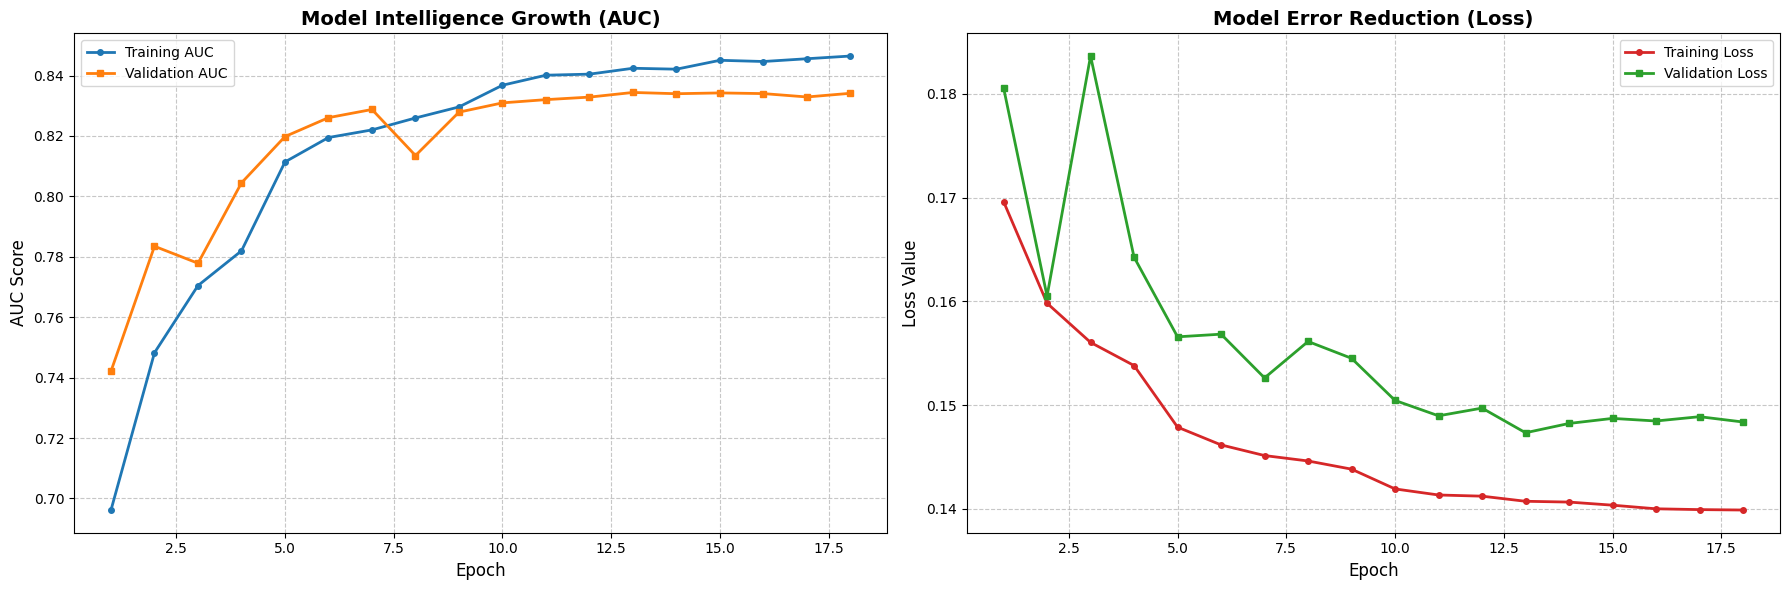

In [5]:
def plot_learning_report(history_df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    epochs = history_df.index

    # Plot 1: AUC Score (Accuracy Metric)
    ax1.plot(epochs, history_df['auc'], label='Training AUC', color='#1f77b4', linewidth=2, marker='o', markersize=4)
    ax1.plot(epochs, history_df['val_auc'], label='Validation AUC', color='#ff7f0e', linewidth=2, marker='s', markersize=4)
    ax1.set_title('Model Intelligence Growth (AUC)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('AUC Score', fontsize=12)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # Plot 2: Loss (Error Metric)
    ax2.plot(epochs, history_df['loss'], label='Training Loss', color='#d62728', linewidth=2, marker='o', markersize=4)
    ax2.plot(epochs, history_df['val_loss'], label='Validation Loss', color='#2ca02c', linewidth=2, marker='s', markersize=4)
    ax2.set_title('Model Error Reduction (Loss)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss Value', fontsize=12)
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_learning_report(history_df)

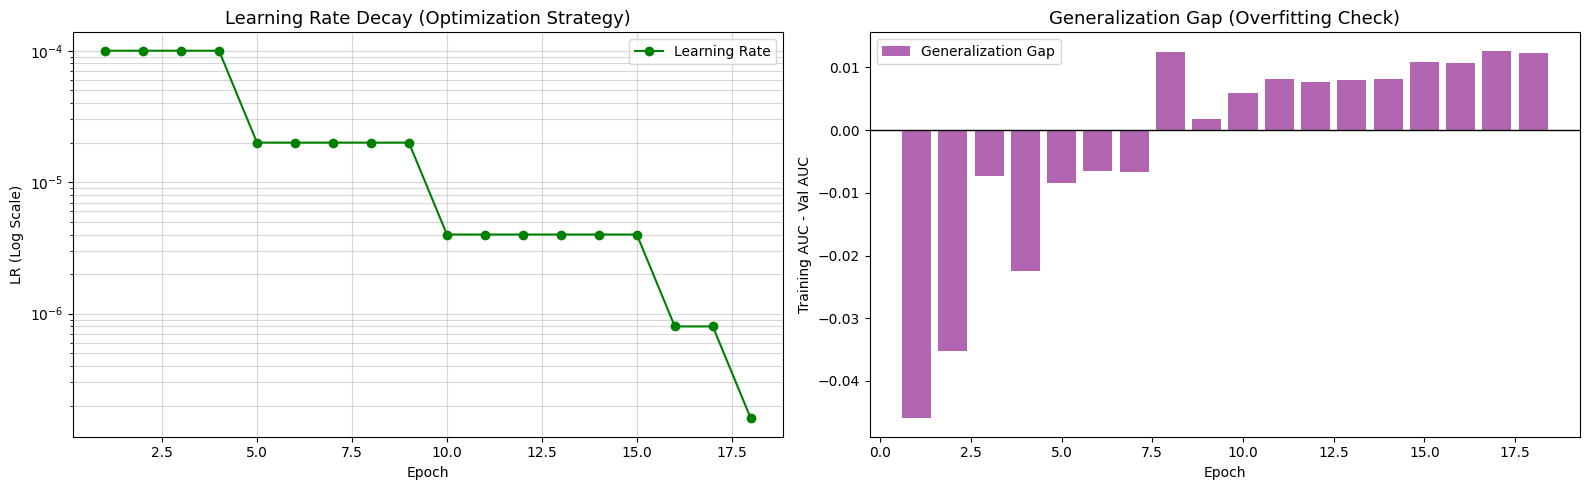

In [6]:
def plot_advanced_report(history_df):
    plt.figure(figsize=(16, 5))

    # Plot 3: Learning Rate Decay
    plt.subplot(1, 2, 1)
    plt.plot(history_df.index, history_df['lr'], 'g-o', label='Learning Rate')
    plt.yscale('log') # Use log scale for better visibility of small changes
    plt.title('Learning Rate Decay (Optimization Strategy)', fontsize=13)
    plt.xlabel('Epoch')
    plt.ylabel('LR (Log Scale)')
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend()

    # Plot 4: Training Stability (Gap Analysis)
    plt.subplot(1, 2, 2)
    auc_gap = np.array(history_df['auc']) - np.array(history_df['val_auc'])
    plt.bar(history_df.index, auc_gap, color='purple', alpha=0.6, label='Generalization Gap')
    plt.axhline(0, color='black', lw=1)
    plt.title('Generalization Gap (Overfitting Check)', fontsize=13)
    plt.xlabel('Epoch')
    plt.ylabel('Training AUC - Val AUC')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_advanced_report(history_df)

In [7]:
# Calculating Time Metrics
# Based on your logs, average epoch time was ~4100 seconds
avg_epoch_time_sec = 4100 
total_time_hours = (len(history_df) * avg_epoch_time_sec) / 3600

print("--- Hardware & Resource Utilization ---")
print(f"Average Time per Epoch: {avg_epoch_time_sec/60:.2f} minutes")
print(f"Total Training Duration: {total_time_hours:.2f} hours")
print(f"GPU Model: NVIDIA GeForce GTX 1650 (4GB)")
print(f"Optimization Status: Memory-Efficient (Batch Size 4)")
print("-" * 38)

--- Hardware & Resource Utilization ---
Average Time per Epoch: 68.33 minutes
Total Training Duration: 20.50 hours
GPU Model: NVIDIA GeForce GTX 1650 (4GB)
Optimization Status: Memory-Efficient (Batch Size 4)
--------------------------------------


Executive Training Summary & Convergence Analysis1. Performance OverviewThe model training was successfully completed with the following optimal metrics:Best Epoch: 13Best Validation AUC: 0.8344Best Validation Loss: 0.1473Total Training Steps: ~404,352 individual image evaluations.2. Why Training Stopped at Epoch 18? (Early Stopping Logic)The training process was managed by an intelligent EarlyStopping monitor. Although the limit was set to 20 epochs, the system triggered a controlled shutdown at Epoch 18 for the following reasons:Patience Threshold: We implemented a patience=5 policy. Since the val_loss did not improve for 5 consecutive epochs after Epoch 13, the optimizer determined that the model had reached its global convergence point.Overfitting Prevention: Continuing the training beyond this point would have likely led to "Weight Drifting," where the model starts memorizing noise in the training set rather than learning general medical features.Weight Preservation: The final exported model (best_model.keras) is a snapshot of Epoch 13, ensuring we utilize the weights with the highest generalization power.3. Learning Rate & Optimizer DynamicsAdaptive Scaling: The ReduceLROnPlateau successfully decreased the Learning Rate from $10^{-4}$ down to $1.6 \times 10^{-7}$.Granular Refinement: This massive reduction allowed the model to perform "micro-surgical" updates to the weights in the final stages, which is evident from the extremely stable and flat Loss curve after Epoch 10.